*In this notebook, I've tried to document my journey of solving a real life problem. This problem is inspired by IBM online course on edx.org. As a beginner, there are codes that I'm unfamiliar with; source of codes has been commented in each cell.*

### Problem Statement
The people of New Yorker use the 311 system to report complaints about the non-emergency problems to local authorities. The Department of Housing Preservation and Development of New York City is the agency that processes 311 complaints that are related to housing and buildings. In the last few years, the number of 311 complaints coming to the Department of Housing Preservation and Development has increased significantly. Thus, our tasks would be:<br>
1. Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first? <br>
2. Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1? <br>
3. Does the Complaint Type that you identified in response to question 1 have an obvious relationship with any particular characteristic or characteristics of the houses or buildings? <br>
4. Can a predictive model be built for a future prediction of the possibility of complaints of the type that you have identified in response to Question 1?

### The Data
#### NYC 311 Complaint Dataset
We are using NYC 311 Complaint Dataset that can be downloaded from: <br>
https://data.cityofnewyork.us/resource/fhrw-4uyv.csv?$limit=100000000&Agency=HPD&$select=created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status <br>
The downloaded data will have complaints submitted between 2010 and 2020.<br>

#### NYC PLUTO Dataset
PLUTO dataset for housing characteristics.<br>
The URL to download the PLUTO dataset zip file: <br>
https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_18v1.zip.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import numpy as np
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
matplotlib.rcParams['figure.figsize'] = [12,8]

In [2]:
df = pd.read_csv('https://data.cityofnewyork.us/resource/fhrw-4uyv.csv?$limit=100000000&Agency=HPD&$select=created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status')

### Data Exploration <br>
This step includes removing columns we do not need, checking missing values and so on.

In [3]:
df.head(5)

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2011-09-13T00:00:00.000,21430297,GENERAL CONSTRUCTION,10457.0,1930 GRAND CONCOURSE,GRAND CONCOURSE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.850106,-73.905460,2011-09-16T00:00:00.000,RESIDENTIAL BUILDING,Closed
1,2011-09-13T00:00:00.000,21430352,GENERAL CONSTRUCTION,11423.0,91-59 191 STREET,191 STREET,ADDRESS,HOLLIS,The Department of Housing Preservation and Dev...,QUEENS,40.712197,-73.768456,2011-10-03T00:00:00.000,RESIDENTIAL BUILDING,Closed
2,2011-09-13T00:00:00.000,21430187,NONCONST,10452.0,1175 GERARD AVENUE,GERARD AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.834706,-73.920721,2011-09-18T00:00:00.000,RESIDENTIAL BUILDING,Closed
3,2011-09-13T00:00:00.000,21430229,PAINT - PLASTER,11233.0,276 CHAUNCEY STREET,CHAUNCEY STREET,ADDRESS,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,40.681289,-73.921668,2011-09-15T00:00:00.000,RESIDENTIAL BUILDING,Closed
4,2011-09-13T00:00:00.000,21430461,GENERAL CONSTRUCTION,10456.0,1064 SHERIDAN AVENUE,SHERIDAN AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.830834,-73.918641,2011-10-03T00:00:00.000,RESIDENTIAL BUILDING,Closed


#### Data Dictionary:
Can be retrieved from: <br>
https://data.cityofnewyork.us/Social-Services/NYC-311-SR-CB05-040714/v83a-kb5d
**created_date**: Date SR was created. <br>
**unique_key**: Unique identifier of a Service Request (SR) in the open data set. <br>
**complaint_type**: This is the first level of a hierarchy identifying the topic of the incident or condition. Complaint Type may have a corresponding Descriptor (below) or may stand alone. <br>
**incident_zip**: Incident location zip code, provided by geo validation. <br>
**incident_address**: House number of incident address provided by submitter. <br>
**street_name**: Street name of incident address provided by the submitter. <br>
**address_type**: Type of incident location information available. <br>
**city**: City of the incident location provided by geovalidation. <br>
**resolution_description**: Describes the last action taken on the SR by the responding agency. May describe next or future steps. <br>
**borough**: Provided by the submitter and confirmed by geovalidation. <br>
**latitude**: Geo based Lat of the incident location. <br>
**longitude**: Geo based Long of the incident location. <br>
**closed_date**: Date SR was closed by responding agency. <br>
**location_type**: Describes the type of location used in the address information. <br>
**status**: Status of SR submitted. <br>

In [4]:
df.shape

(6422910, 15)

In [5]:
df.isnull().sum()

created_date                   0
unique_key                     0
complaint_type                 0
incident_zip               80777
incident_address           52831
street_name                52831
address_type               84752
city                       80349
resolution_description      7852
borough                        0
latitude                   80751
longitude                  80751
closed_date               143881
location_type              52830
status                         0
dtype: int64

Since most columns(eg. *created_date, complaint_type, borough, status*) that we are interested in have no null values, no changes will be made on the other null values. Now, we proceed to **Question 1**.

### Question 1 - What Is the Top Complaint Type?

In [6]:
df_complaint = df.copy()

#Calculate total cases of all complaint types
df_complaint = df_complaint['complaint_type'].value_counts()

#Sort in descending orders to find top 5 complaint types
df_complaint = df_complaint.sort_values(ascending=False)
df_complaint_5 = df_complaint.head(5)

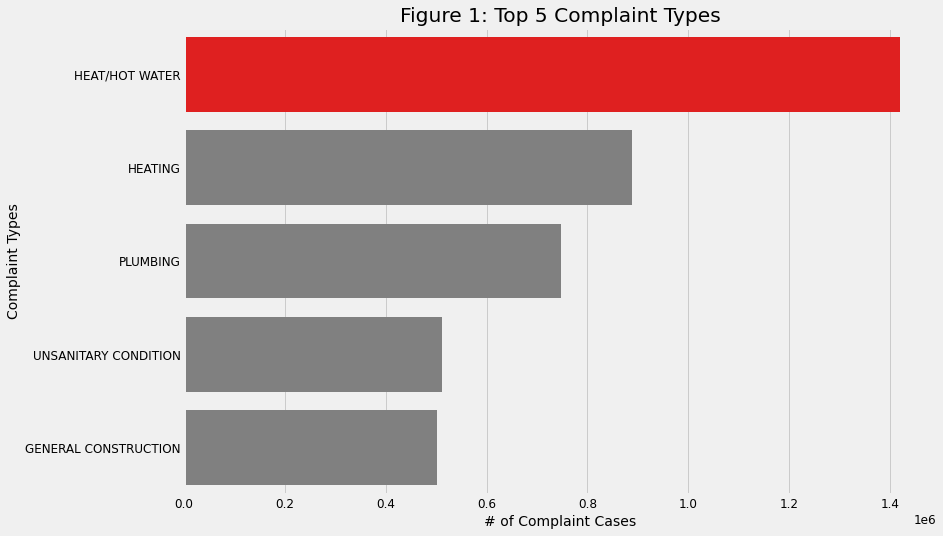

In [7]:
#https://stackoverflow.com/questions/3832809/how-to-change-the-color-of-a-single-bar-if-condition-is-true-matplotlib
fig, ax = plt.subplots()
clrs = ['grey' if (x < max(df_complaint_5.values)) else 'red' for x in df_complaint_5.values ]
fig = sns.barplot(x=df_complaint_5.values, y=df_complaint_5.index, palette=clrs, orient='h')
plt.title('Figure 1: Top 5 Complaint Types')
plt.xlabel('# of Complaint Cases')
plt.ylabel('Complaint Types')
plt.show()

From **Figure 1**, we can see that the Top 3 Complaint Types are **HEAT/HOT WATER**, **HEATING** and **PLUMBING**. The amount of complaint cases on HEAT/HOT WATER is **double** of the amount of people complaint cases on **HEATING**. However, **HEAT/HOT WATER** and **HEATING** seems to complain about the same thing. Let's have a closer look; visualise the *trend* of all Top 5  complaints to ensure **HEAT/HOT WATER** is what we really need to focus on

In [162]:
#Function: Indexing dataset with timeseries
def timeseries(df_, cond):
    df_ = df.copy()
    df_ = df_.loc[df_['complaint_type'] ==  cond]
    df_ = df_.sort_values('created_date')
    df_ = df_.set_index('created_date')
    df_.index = pd.to_datetime(df_.index) 
    df_ = df_.resample('MS').count() 
    return df_

In [167]:
#dataset for heat/hot water
df_hhw = timeseries(df, 'HEAT/HOT WATER')
#dataset for heating
df_h = timeseries(df, 'HEATING')
#dataset for plumbing
df_p = timeseries(df, 'PLUMBING')
#dataset for Unsanitary Condition
df_uc = timeseries(df, 'UNSANITARY CONDITION')
#dataset for General Construction
df_gc = timeseries(df, 'GENERAL CONSTRUCTION')

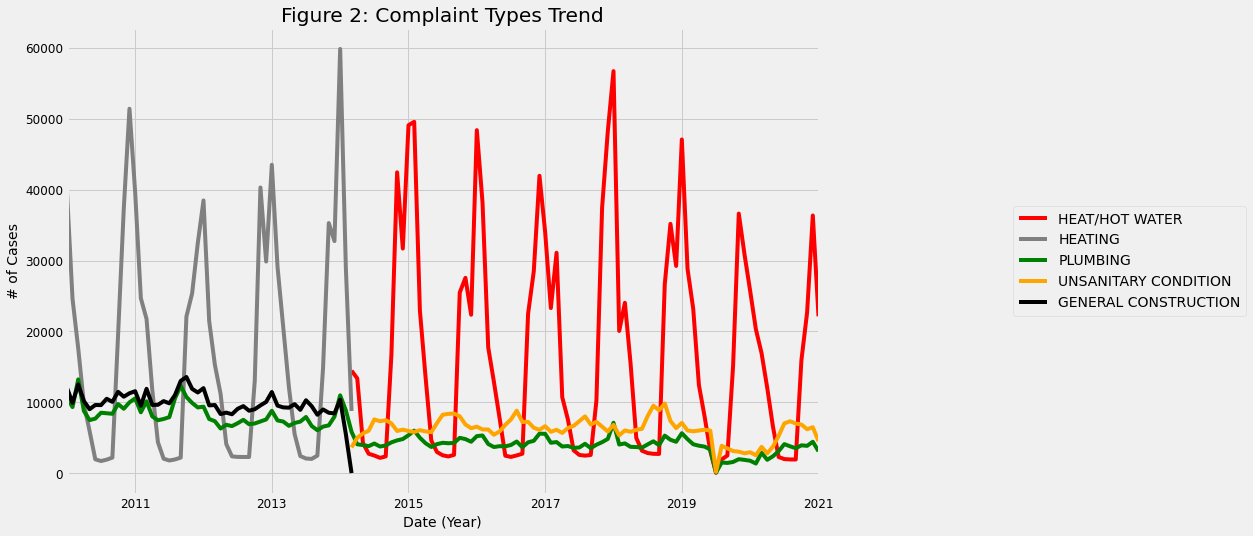

In [171]:
fig, ax = plt.subplots()
df_hhw['complaint_type'].plot(color = 'red')
df_h['complaint_type'].plot(color = 'grey')
df_p['complaint_type'].plot(color = 'green')
df_uc['complaint_type'].plot(color = 'orange')
df_gc['complaint_type'].plot(color = 'black')


plt.title('Figure 2: Complaint Types Trend')
plt.xlabel('Date (Year)')
plt.ylabel('# of Cases')
plt.legend(labels = ('HEAT/HOT WATER', 'HEATING', 'PLUMBING', 'UNSANITARY CONDITION', 'GENERAL CONSTRUCTION'), loc='center left', bbox_to_anchor = (1.25, 0.5), ncol=1)
plt.show()

From **Figure 2**, we can see that the total of the other complaint cases are relatively less compare to **HEAT/HOT WATER** and **HEATING**. However, the records of **HEATING** complaints stopped in the year 2014, which had been 7 years ago. Thus, we will be focuing on **HEAT/HOT WATER**. Let's have a look on how they reported their complaints. 

### Question 2 - What Areas Should the Agency Focus On? 
*(eg. boroughs, ZIP codes, or street)* <br>

In [11]:
import folium
import json
from folium import plugins

#### 2.1 Borough

In [12]:
#Function: Filter dataset for different areas (eg. borough, zip, street)
def filter_df(df_, cond):
    df_ = df.copy()
    df_ = df_[[cond,'complaint_type']]
    df_ = df_.loc[df['complaint_type']=='HEAT/HOT WATER']
    df_ = df_[cond].value_counts()
    return df_

In [13]:
#dataset filter by borough
df_borough = filter_df(df, 'borough')


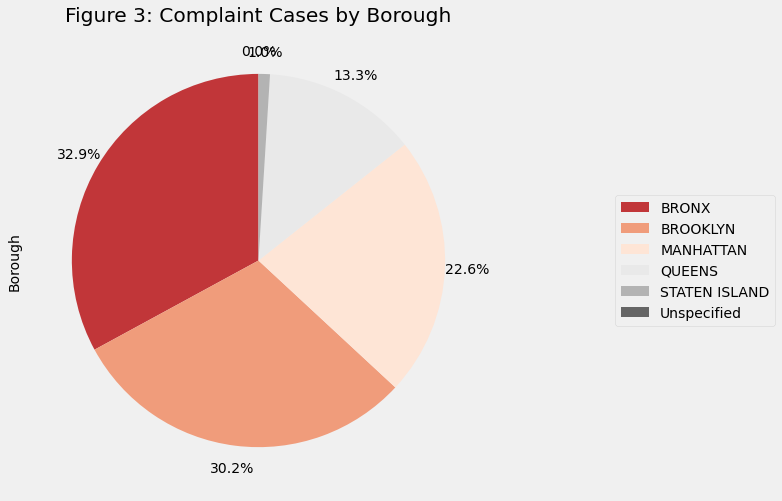

In [309]:
color_list = sns.color_palette('RdGy')

fig, ax = plt.subplots()
fig = df_borough.plot(kind = 'pie',
                        autopct = '%1.1f%%',
                        labels = None,
                        startangle = 90,
                        pctdistance = 1.12,
                        colors = color_list,
                        
                      )
plt.title('Figure 3: Complaint Cases by Borough') 
plt.ylabel('Borough')
plt.legend(labels = df_borough.index, loc='center left', bbox_to_anchor = (1.25,0.5), ncol=1)

From **Figure 3**, we can see that most complaint cases came from **BRONX, 32.9%** while people in **BROOKLYN** contriubted **30.2%%** of all the HEAT/HOT WATER Complaint cases in New York. Since BRONX and BROOKLYN has almost same amount of complaint cases, we are unable to decide which borough to focus on. Thus, we can start by visualising the all the HEAT/HOT WATER Complaint cases by **zip** on a New York Map.

#### 2.2 Zip

In [15]:
#dataset filter by zip
df_zip = filter_df(df, 'incident_zip')

#format dataset for folium map
df_zip = df_zip.to_frame()
df_zip.reset_index(inplace=True)
df_zip.rename(columns={'index':'zipcode','incident_zip':'NumCases'}, inplace=True)

df_zip['zipcode'] = df_zip['zipcode'].astype(int) #to make zip become integer (remove .0)
df_zip['zipcode'] = df_zip['zipcode'].astype(str) #to str so that it matches  key_on='feature.properties.postalcode'

In [90]:
#https://towardsdatascience.com/making-3-easy-maps-with-python-fb7dfb1036
#https://jsspina.carto.com/tables/nyc_zip_code_tabulation_areas_polygons/public/map for geojson file


fig4 = folium.Map(location=[40.7128  ,-74.0060], tiles='Stamen Toner', zoom_start=11)

    fig4.choropleth(geo_data='nyZips.geojson', data=df_zip, columns=['zipcode', 'NumCases'], \
                 key_on='feature.properties.postalcode', fill_color='YlOrRd', fill_opacity=0.5)

fig4

From the above map, it can be seen that most complaint cases came from **BRONX** (red-shaded) followed by **BROOKLYN** (shaded in red & orange). Now, we look at # of cases by street.

In [17]:
#dataset filter by street
df_street =  filter_df(df, 'street_name')

#format dataset into a table & show Top 5
df_street = df_street.to_frame()
df_street.rename(columns={'street_name':'NumCases'}, inplace=True)
df_street.head(5)

,NumCases
GRAND CONCOURSE,25331
BROADWAY,16975
ELMHURST AVENUE,12482
OCEAN AVENUE,11438
MORRIS AVENUE,10508


From the above Table, we can see that people living in **GRANDCONCOURSE** complainted most followed by **BROADWAY**. It seems to matches the above map, see below. <br>
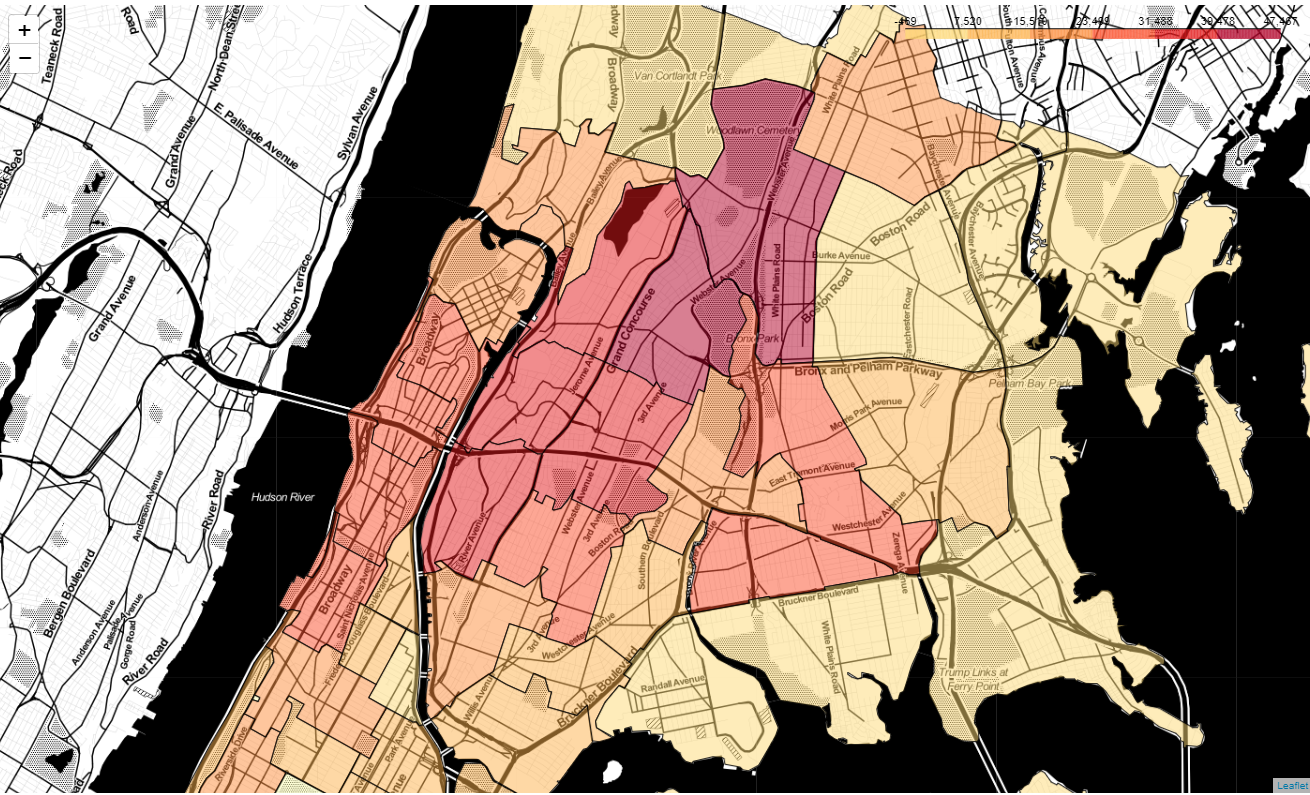

### Question 3 - What Is the Relationship between Housing Characteristics and Complaints?
*(eg. Address, BldgArea, BldgDepth, BuiltFAR, CommFAR, FacilFAR, Lot, LotArea, LotDepth, NumBldgs, NumFloors, OfficeArea, ResArea, ResidFAR, RetailArea, YearBuilt, YearAlter1, ZipCode, YCoord, and XCoord)* <br>
From **Question 2**, we discovered that most complaint cases came from **BRONX**. Thus, we will focus on complaints **BRONX**.

#### Import Data Set
As we recall, our current data set does not contain any building characteristics. Hence, we would need to import another data set with building characteristics. 

In [98]:
#unzip from downloaded file (from PLUTO)
df_bx = pd.read_csv(r'C:\Users\User\Downloads/BX_18v1.csv')

#As recommended, bx stands for Bronx
df_bx = df_bx[['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord', 'XCoord']]

In [19]:
df_bx.head(5)

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
0,122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,1,0.0,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0
1,126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,2,1.0,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0
2,138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,1,2.0,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0
3,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.0,1,5.0,0,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0
4,148 BRUCKNER BOULEVARD,8595,70.0,4.58,5.0,6.5,18,1875,75.0,1,5.0,0,6876,6.02,1719,1920,2009,10454.0,232040.0,1006363.0


#### Data Dictionary:
Can be retrieved from: https://www1.nyc.gov/assets/planning/download/pdf/data-maps/open-data/pluto_datadictionary.pdf?r=20v8 <br>
**Address**: The building's address. <br>
**BldgArea**: The total gross area in square feet, except for condominium measurements which come from the Condo Declaration and are net square footage not gross.<br>
**BldgDepth**: The building’s depth, which is the effective perpendicular distance, measured in feet.<br>
**BuiltFAR**: The BUILT FLOOR AREA RATIO is the total building floor area divided by the area of the tax lot.<br>
**CommFAR**: The maximum allowable commercial floor area ratio, based on the zoning district classification occupying the greatest percentage of the tax lot’s area as reported in ZoneDist1. <br>
**FacilFAR**:  The maximum allowable community facility floor area ratio, based on the zoning district classification occupying the greatest percentage of the tax lot’s area as reported in ZoneDist1.<br>
**Lot**: The number of the tax lot.<br>
**LotArea**: Total area of the tax lot, expressed in square feet rounded to the nearest integer.<br>
**LotDepth**: The tax lot's depth measured in feet.<br>
**NumBldgs**: The number of buildings on the tax lot.<br>
**NumFloors**: The number of full and partial stories starting from the ground floor, for the tallest building on the tax lot.<br>
**OfficeArea**: An estimate of the exterior dimensions of the portion of the structure(s) allocated for office use.<br>
**ResArea**: An estimate of the exterior dimensions of the portion of the structure(s) allocated for residential use.<br>
**ResidFAR**: The maximum allowable residential floor area ratio, based on the zoning district classification occupying the greatest percentage of the tax lot’s area as reported in ZoneDist1.<br>
**RetailArea**: An estimate of the exterior dimensions of the portion of the structure(s) allocated for retail use.<br>
**YearBuilt**: The year construction of the building was completed.<br>
**YearAlter1**: If a building has only been altered once, YEAR ALTERED 1 is the date that alteration began.<br>
**ZipCode**:A ZIP code that is valid for one of the addresses assigned to the tax lot.<br>
**YCoord**: The Y coordinate of the XY coordinate pair which depicts the approximate location of the lot.<br>
**XCoord**: The X coordinate of the XY coordinate pair which depicts the approximate location of the lot.<br>

### Merge Data Sets
Now, we need to join the data sets to answer Question 3.

In [125]:
#df filtered by complaint_type, borough
df_hhw_bx = df.copy()

mask = (df_hhw_bx['complaint_type'] == 'HEAT/HOT WATER') & (df_hhw_bx['borough'] == 'BRONX')

df_hhw_bx = df_hhw_bx.loc[mask]

#.value_counts for each address

df_hhw_bx_inc = df_hhw_bx['incident_address']
df_hhw_bx_inc = df_hhw_bx_inc.value_counts()
df_hhw_bx_inc = df_hhw_bx_inc.to_frame()
df_hhw_bx_inc = df_hhw_bx_inc.reset_index()
df_hhw_bx_inc = df_hhw_bx_inc.rename(columns={'index':'inc_adrress','incident_address':'counts'})

#merge
df_hhw_bx_inc = pd.merge(left=df_hhw_bx_inc, right=df_bx, how='left', left_on='inc_adrress', right_on='Address')
df_hhw_bx_inc.dropna(axis=0,inplace=True)
df_hhw_bx_inc.drop(columns={'inc_adrress'}, inplace=True, axis=0)

Since we are looking for the relationship between complaints and building characteristics, we can have a look on the correlation between them, simply by applying .corr().<br>

It has a value between -1 and 1 where: <br>
https://www.statology.org/how-to-read-a-correlation-matrix/

-1 indicates a perfectly negative linear correlation between two variables. <br>
0 indicates no linear correlation between two variables. <br>
1 indicates a perfectly positive linear correlation between two variables. <br>


In [126]:
df_hhw_bx_inc_corr = df_hhw_bx_inc.corr()

It's easier for us to read a picture instead of a series of number, so we turn it into a colormap.

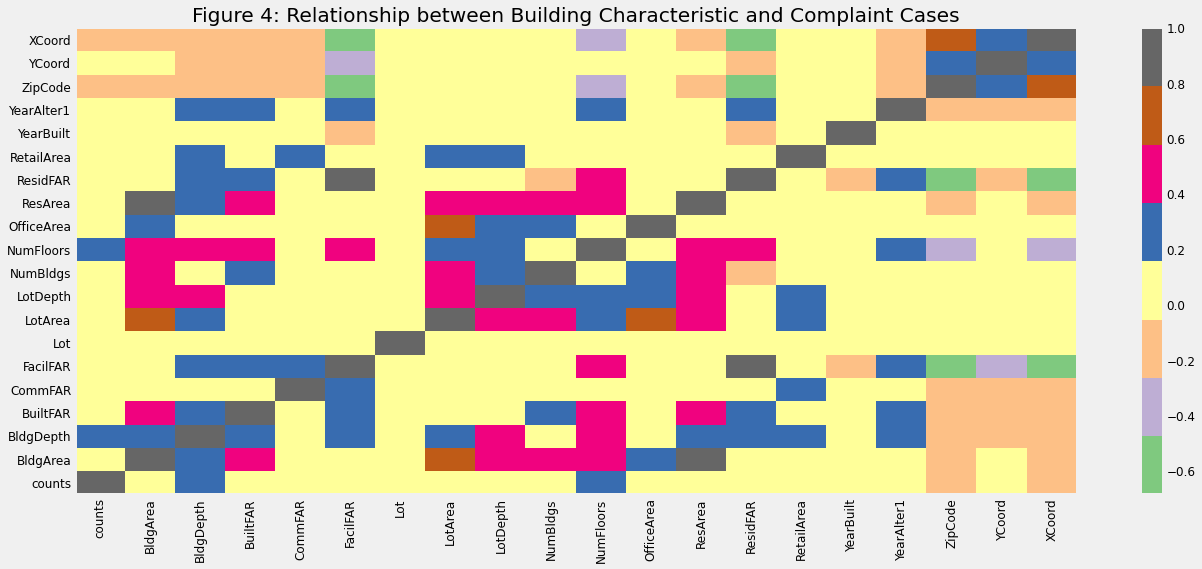

In [127]:
#Visualise correlation
import numpy as np
fig, ax= plt.subplots()
im = ax.pcolor(df_hhw_bx_inc_corr, cmap='Accent')
fig.set_figheight(8)
fig.set_figwidth(20)

#label names
row_labels = df_hhw_bx_inc_corr.columns
col_labels = df_hhw_bx_inc_corr.index

#move ticks and labels to the center
ax.set_xticks(np.arange(df_hhw_bx_inc_corr.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_hhw_bx_inc_corr.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.title('Figure 4: Relationship between Building Characteristic and Complaint Cases')

plt.show()

From **Figure 4**, the most impactful characteristics are: **BldgDepth, NumFloors, XCoord** and **Zipcode**. Let's have a look on how building with different *NumFloors* in different *zip* complaints on the HEAT/HOT WATER matters.

In [132]:
#df for visualisation
df_hhw_bx_merged = pd.merge(left=df_hhw_bx, right=df_bx, how='left', left_on='incident_address', right_on='Address')

df_zipnf = df_hhw_bx_merged.copy()
df_zipnf['count'] = df_zipnf['NumFloors'].count()
df_zipnf = df_zipnf[['ZipCode','NumFloors','count']]
df_zipnf = df_zipnf.groupby(['ZipCode','NumFloors'], as_index=False).count()
df_zipnf = df_zipnf.pivot(index= 'NumFloors', columns='ZipCode')
df_zipnf = df_zipnf.fillna(0)

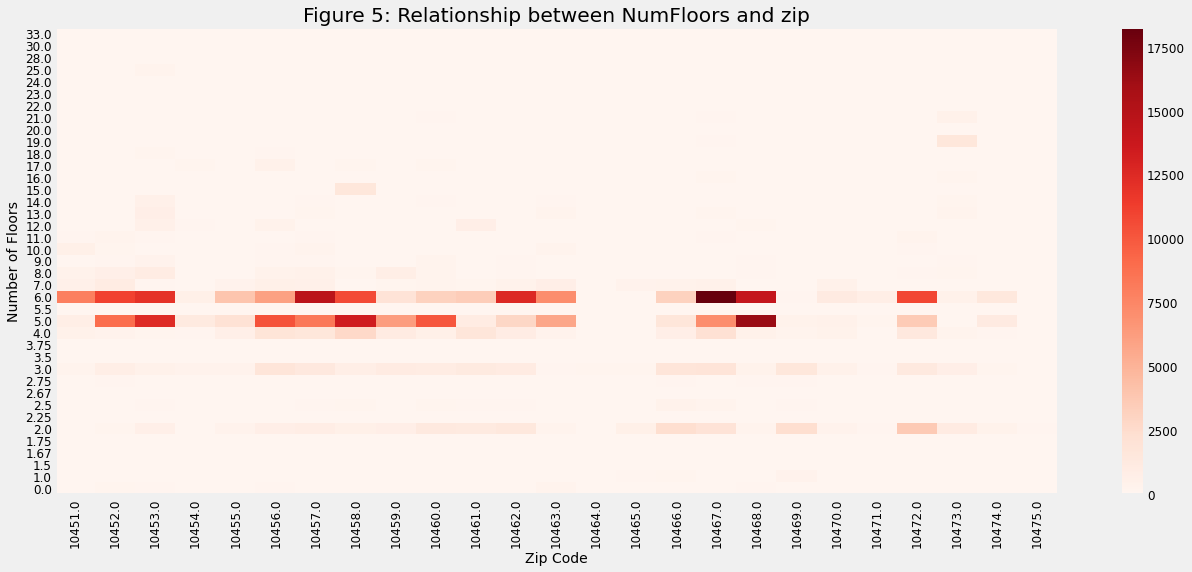

In [133]:
import numpy as np
fig, ax = plt.subplots()
im = ax.pcolor(df_zipnf, cmap='Reds')
fig.set_figheight(8)
fig.set_figwidth(20)

#label names
row_labels = df_zipnf.columns.levels[1]
col_labels = df_zipnf.index

#move ticks and labels to the center
ax.set_xticks(np.arange(df_zipnf.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_zipnf.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.title('Figure 5: Relationship between NumFloors and zip')
plt.xlabel('Zip Code')
plt.ylabel('Number of Floors')
plt.show()

Now, although there might be some difference between each zip, we can observe that most Complaints Cases came from people who lives in building with **5** and **6 Floors**.

A small conclusion can be drawn from Question 3 is that the HPD should focus on Building with **5 & 6 Floors** in **BRONX** borough.

### Question 4 - Predict Complaint Types
Before we start our forecast, we should have a look on the Monthly Complaint Cases. <br>
Hence, Question 4 can be divided into 2 parts: <br>

1. Monthly Complaint Cases visualisation 
2. Forecast

https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

#### 4.1 Visualising Complaint Cases Time Series Data

Text(0, 0.5, '# of Cases')

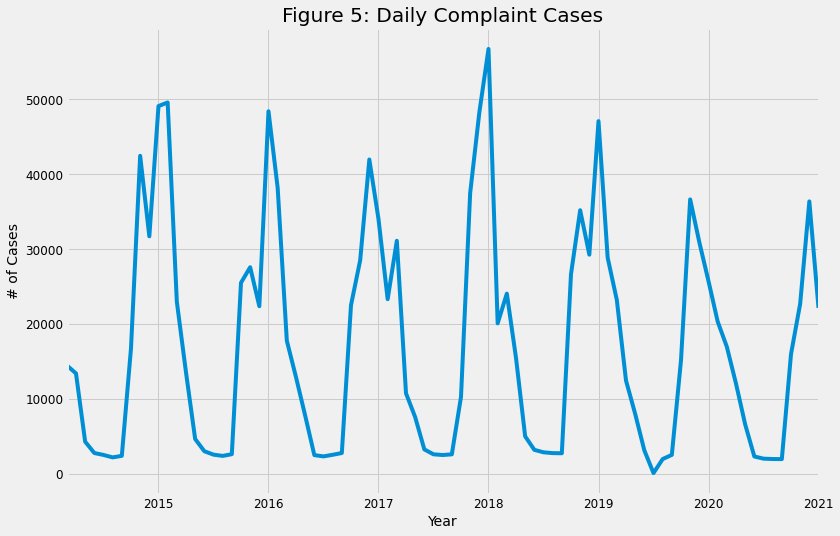

In [180]:
fig, ax = plt.subplots()
fig = df_hhw['complaint_type'].plot()
plt.title('Figure 5: Daily Complaint Cases')
plt.xlabel('Year')
plt.ylabel('# of Cases')

There are some distinguishable pattern, it appears to be some sort of cycle, the cases spikes at the beginning of the years and goes down in the middle of the year. It seems it is highly related to the average temperature in New York. So, let's run a check.<br>

In [212]:
#dataset of temperature
temp = pd.read_csv(r'C:\Users\User\Downloads/temperature.csv')
#https://www.kaggle.com/sudalairajkumar/daily-temperature-of-major-cities
temp = temp[['myDt','AvgTemperature']]
temp = temp.sort_values('myDt', ascending=True)
temp['myDt'] = pd.to_datetime(temp['myDt'])
temp = temp.set_index('myDt')
temp = temp.resample('MS').mean()
temp.index.min(), temp.index.max()

(Timestamp('2014-03-01 00:00:00', freq='MS'),
 Timestamp('2020-05-01 00:00:00', freq='MS'))

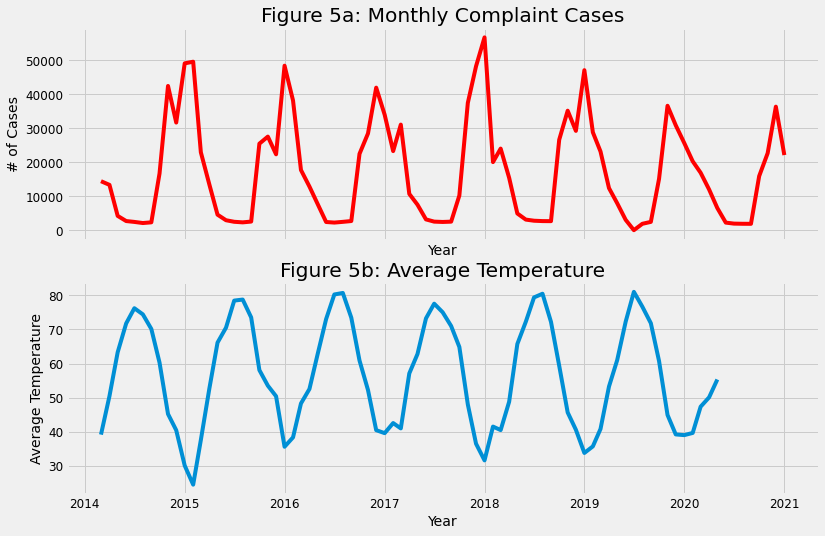

In [232]:
fig,( ax1, ax2) = plt.subplots(2,1, sharex=True)

ax1.plot(df_hhw['complaint_type'], color='red')
ax1.set_title('Figure 5a: Monthly Complaint Cases')
ax1.set_xlabel('Year')
ax1.set_ylabel('# of Cases')


ax2.plot(temp['AvgTemperature'])

plt.title('Figure 5b: Average Temperature')
plt.xlabel('Year')
plt.ylabel('Average Temperature')

plt.show()

Our hypothesis seems to be true and proved by the above plot, the complaint cases increased with decreasing temperature and grew gradually when the temperature crossed below 60 degree Fahrenhit. <br>
<br>

Actually after a quick search on Google, it's not hard to find out that people in New York suffered a lot during these cold season, HPD even announced **'Heat Season'** begins on October 1st every year to May 31st the next year. During this season, all residential building owners are required to maintain indoor temperatures at 68 degrees when outdoor temperatures fall below 55 degrees during the day. Indoor temperatures must also be a minimum of 62 degrees overnight, regardless of outdoor temperatures. Building owners are legally required to provide hot water at 120 degrees year-round.

(https://www1.nyc.gov/site/hpd/news/042-20/hpd-start-the-2020-2021-heat-season-new-york-city#/0)

Though the complaint cases are very much dependent on the temperature, HPD has been putting in effort to end or minimise this issue. HPD inspectors are sent to conduct heat and hot water inspections and emergency repairs to ensure the heat and hot water is provided as required by law. <br>
Thus, we can still do our part on forecasting the future complaint cases.

**Trend Visualisation**

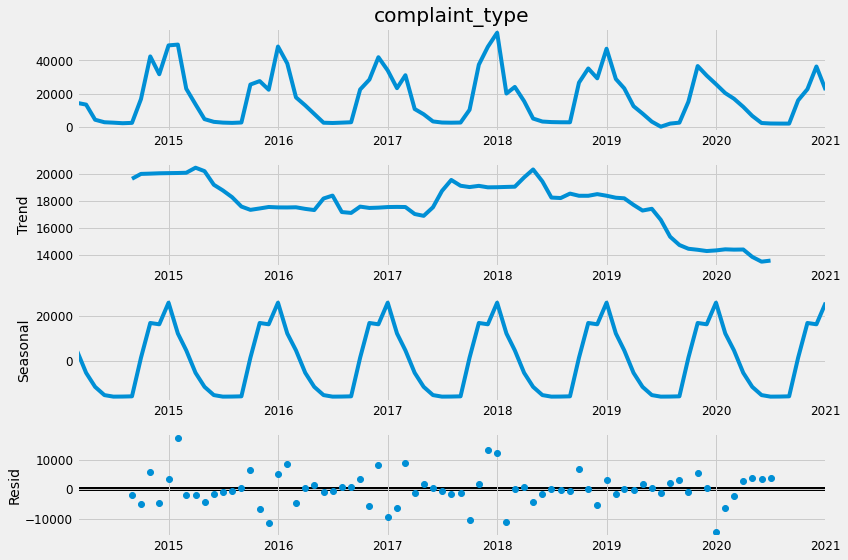

In [297]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(df_hhw['complaint_type'], model='additive')

fig = decomposition.plot()

plt.show()

The plot above clearly shows that the complaint cases is unstable, along with its obvious seasonality which is mostly due to the heat season.

#### 4.2 Forecast

Forecast with Time Series are slightly different with forecasting other data as they are time dependent. 

Prophet Forecasting Library Prophet, or “Facebook Prophet,” is an open-source library for univariate (one variable) time series forecasting developed by Facebook.

Prophet implements what they refer to as an additive time series forecasting model, and the implementation supports trends, seasonality, and holidays.

Implements a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects

— Package ‘prophet’, 2019.

**4.2.1 Time series forecasting with ARIMA**

In [238]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [240]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_hhw['complaint_type'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1880.7077468368136
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1556.5716052871194
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1454.7084427472753
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1200.23842090552
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1468.20027411259
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1444.1102807854609
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1226.4703546416488
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1202.3861205934465
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1804.9015418029376
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1537.2162137918954
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1436.9581472851683
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1182.7867440268378
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1553.4459441281742
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1511.3401900476656
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1228.627604202372
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1184.6569529990643
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1747.8460534264482
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1465.68768834782

The above output suggests that SARIMAX(0, 1, 1)x(1, 1, 1, 12) yields the lowest AIC value of 1171.727. Therefore we should consider this to be optimal option.

**Fitting the ARIMA model**

In [244]:
mod = sm.tsa.statespace.SARIMAX(df_hhw['complaint_type'],
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

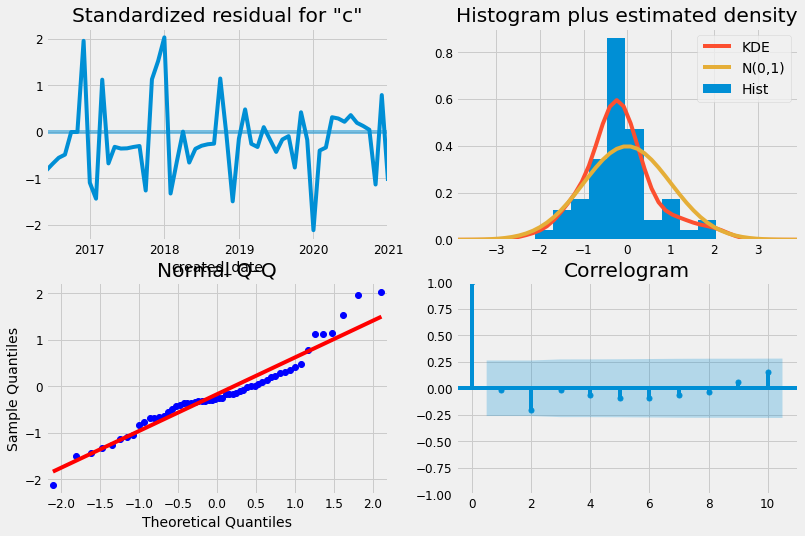

In [245]:
results.plot_diagnostics()
plt.show()

It is not perfect, however, our model diagnostics suggests that the model residuals are near normally distributed.

**Validating forecasts**
To help us understand the accuracy of our forecasts, we compare predicted number of complaint cases to cases of the original data set, and we set forecasts to start at 2017–01–01 to the end of the data.

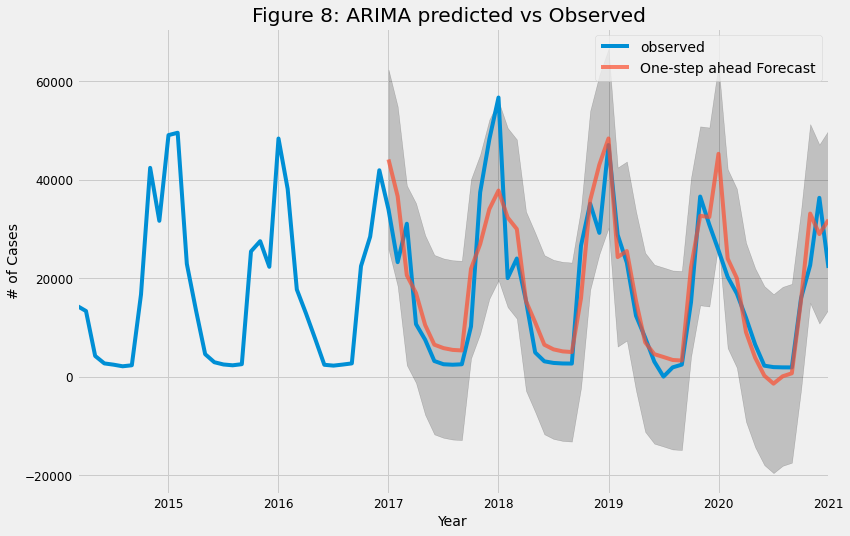

In [310]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df_hhw['complaint_type'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Year')
ax.set_ylabel('# of Cases')
plt.legend()
plt.title('Figure 8: ARIMA predicted vs Observed ')
plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the end of the year and captured the seasonality toward the *heat season (from October to May)*.

In [248]:
from sklearn.metrics import mean_squared_error

In [250]:
y_forecasted = pred.predicted_mean
y_truth = df_hhw['complaint_type']['2017-01-01':]

print('RMSE = %.1f'  %np.sqrt(mean_squared_error(y_forecasted,  y_truth)))

RMSE = 7388.5


In statistics, Root Mean Square Error (RMSE) tells us that our model was able to forecast the monthly complaint cases in the test set within 7388 of the real number of cases. Our monthly complaint cases range from around 400 to over 40,000. In my opinion, this is a pretty good model so far.

**Producing and visualizing forecasts**

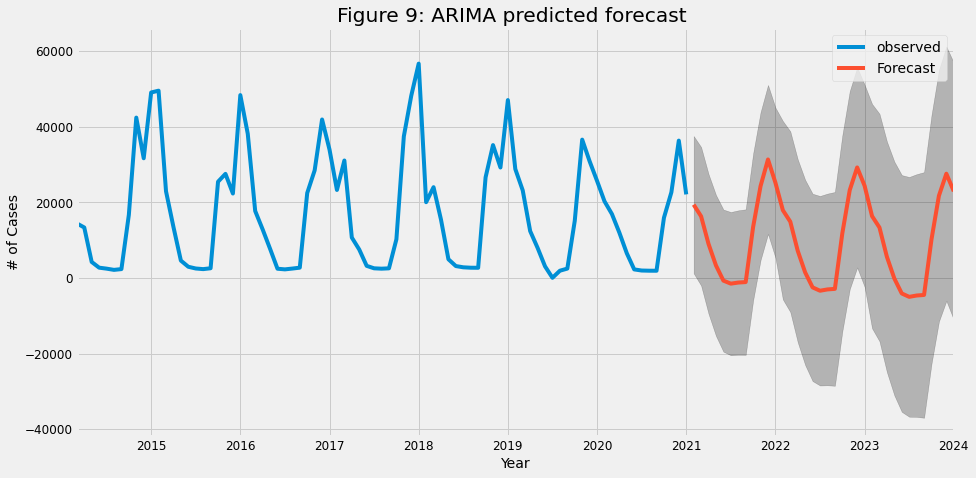

In [304]:
pred_uc = results.get_forecast(steps=36)
pred_ci = pred_uc.conf_int()
ax =  df_hhw['complaint_type'].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Year')
ax.set_ylabel('# of Cases')
plt.legend()
plt.title('Figure 9: ARIMA predicted forecast ')
plt.show()


Our model clearly captured monthly complaint cases seasonality. However, as we forecast further out into the future, it is natural for us to become less confident in our values; the lowest total is decreasing below 0. 

**4.2.2 Time Series Modeling with Prophet**

Released by Facebook in 2017, forecasting tool Prophet is designed for analyzing time-series that display patterns on different time scales such as yearly, weekly and daily. It also has advanced capabilities for modeling the effects of holidays on a time-series and implementing custom changepoints. Therefore, we are using Prophet to get a model up and running.

In [254]:
from fbprophet import Prophet

In [262]:
z = df_hhw['complaint_type']
z = z.reset_index()
z.rename(columns={'created_date':'ds', 'complaint_type':'y'}, inplace=True)

**Fitting the Prophet model**

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(1.9750000000000014, 0.5, '# of Cases')

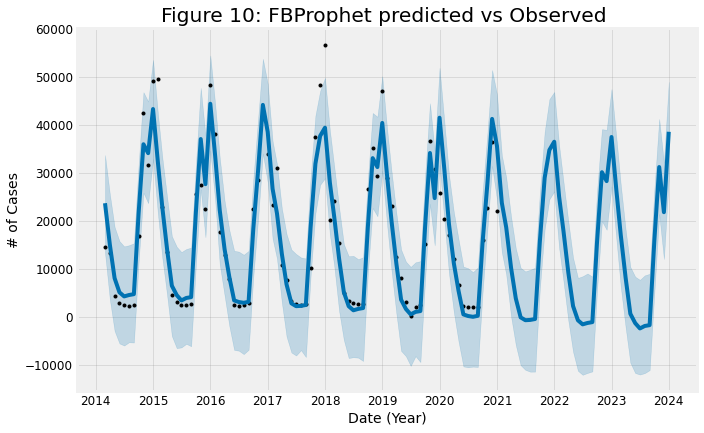

In [306]:
m = Prophet(interval_width=0.95)
m.fit(z)
future = m.make_future_dataframe(periods=36, freq='MS')
forecast = m.predict(future)
m.plot(forecast)


plt.title('Figure 10: FBProphet predicted vs Observed ')
plt.xlabel('Date (Year)')
plt.ylabel('# of Cases')


In [282]:
y_forecasted = forecast['yhat'][0:49]
y_truth = df_hhw['complaint_type']['2017-01-01':]

print('RMSE = %.1f'  %np.sqrt(mean_squared_error(y_forecasted,  y_truth)))

RMSE = 15471.1


**Forecast Visualization**

Text(0.5, 1.0, 'Figure 11: Complaint Cases Estimate')

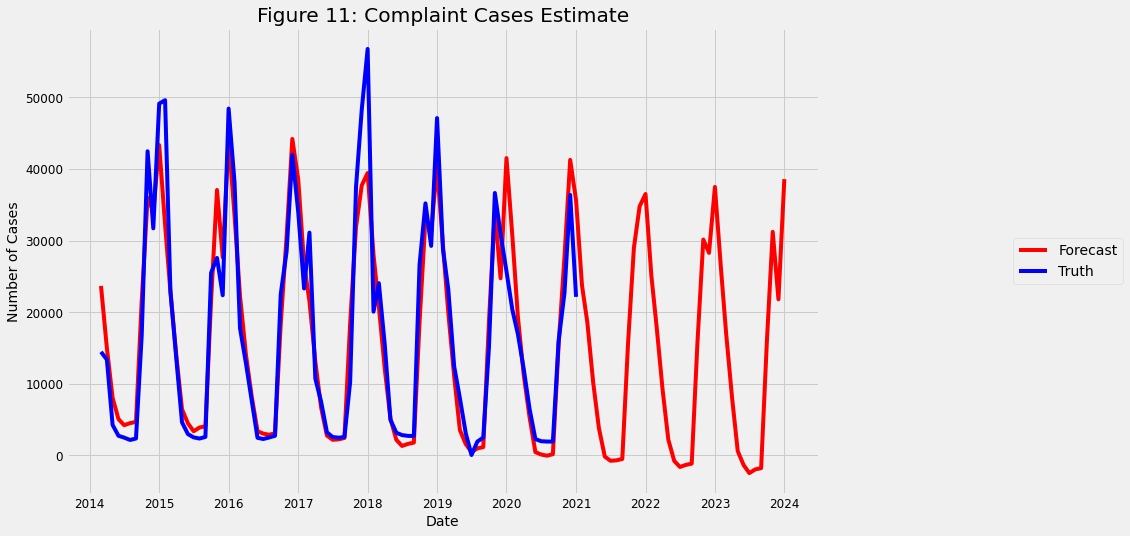

In [308]:
plt.figure()
plt.plot(forecast['ds'], forecast['yhat'], 'r-')
plt.plot(z['ds'], z['y'], 'b-')

plt.plot()
plt.legend(labels = ('Forecast', 'Truth'), loc='center left', bbox_to_anchor = (1.25, 0.5), ncol=1)
plt.xlabel('Date') 
plt.ylabel('Number of Cases')
plt.title('Figure 11: Complaint Cases Estimate')


**Trends and Patterns**

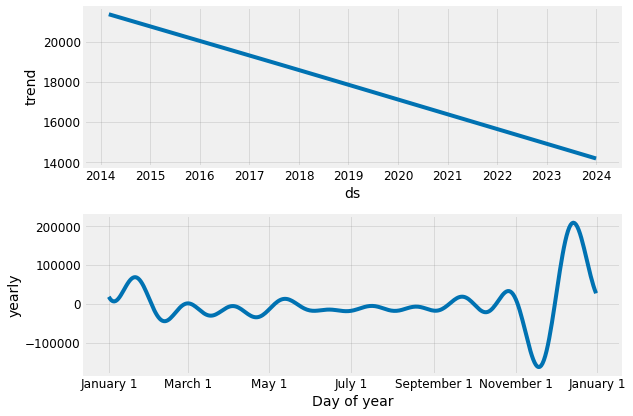

In [294]:
m.plot_components(forecast);

Good to see that the number of complaint case for has been linearly dereasing over time and will be keep declining, and also the peak month is December. <br>
It is very heart warming knowing that HPD has already puuting effort to access complainants’ apartments since heat season 2018, and also during the height of local COVID-19 outbreak, conducting over 100,000 heat and hot water inspections, their hard work seems to pay off as the number of cases is in a downtrend. However, increasing effort should be given as there are still people suffering in the cold during heat season, especially we are also in the COVID-19 pandemic. Thanks for reading and stay safe.